In [ ]:
# ECGR 4105 HW1: Test/Train split and input normalization
# Author: Lucas Therrien
# Student ID #801122089
# GitHub Link: https://github.com/lucastherrien/ECGR4105HW2

In [ ]:
##_________________________________________##
## Setup
##_________________________________________##

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib.colors import ListedColormap
#Suppress all warnings because they annoy me
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##_________________________________________##
## Problem 1
##_________________________________________##

In [2]:
#Load diabetes dataset
tmc = pd.read_csv('diabetes.csv')
tmc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Create input dataset x
x = tmc[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
#Create output dataset y
y = tmc[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [6]:
#Split X and Y into test (20%) and train (80%) datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [7]:
# Standardize Data
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [18]:
# Create logistic regression model
C = [100, 10, 1, .1, .001]
best_C = 0
best_acc = 0
for c in C:
    clf = LogisticRegression(penalty='l1',C=c,solver='liblinear')
    clf.fit(x_train,y_train)
    train_accuracy = clf.score(x_train,y_train)
    val_accuracy = clf.score(x_test,y_test)
    if(val_accuracy>best_acc):
        best_acc = val_accuracy
        best_C = c
    print('C: ',c)
    print('training accuracy:',train_accuracy)
    print('validation accuracy:',val_accuracy)
    print('')

C:  100
training accuracy: 0.7817589576547231
validation accuracy: 0.7597402597402597

C:  10
training accuracy: 0.7817589576547231
validation accuracy: 0.7597402597402597

C:  1
training accuracy: 0.7801302931596091
validation accuracy: 0.7597402597402597

C:  0.1
training accuracy: 0.7768729641693811
validation accuracy: 0.7532467532467533

C:  0.001
training accuracy: 0.6530944625407166
validation accuracy: 0.6428571428571429



In [19]:
# Create classification report from best model
clf = LogisticRegression(penalty='l1',C=best_C,solver='liblinear')
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
cr = classification_report(y_test,preds)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



Text(50.722222222222214, 0.5, 'actual label')

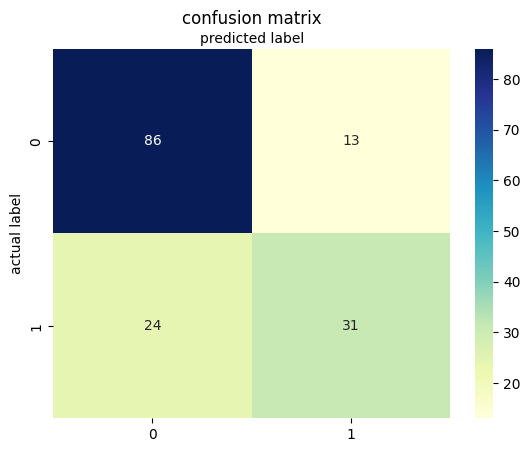

In [27]:
# Create confusion matrix
cm = confusion_matrix(y_test,preds)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position('top')
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [ ]:
##_________________________________________##
## Problem 2
##_________________________________________##

In [34]:
# Create kfold and cross validate model

N = [5,10]
for n in N:
    kfold = KFold(n_splits=n,random_state=0,shuffle=True)
    clf = LogisticRegression(solver='liblinear')
    cvs = cross_val_score(clf,x,y,cv=kfold)
    print('Kfolds: ', n)
    print('Accuracy: ',cvs.mean()*100)
    print('')

Kfolds:  5
Accuracy:  76.55547067311772

Kfolds:  10
Accuracy:  76.81818181818181



In [36]:
# The average accuracy with cross validation was slightly lower than its counterpart in problem 1

In [ ]:
##_________________________________________##
## Problem 3
##_________________________________________##

In [44]:
# Load Cancer Data
can = load_breast_cancer()
x = can.data
y = can.target

In [45]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [48]:
# Test/train split (80 % train, 20 % test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# standardize input
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Part 1, logistic regression, 30 parameters, no parameter penalties

In [49]:
# Create logistic regression model
C = [100, 10, 1, .1, .001]
best_C = 0
best_acc = 0
for c in C:
    clf = LogisticRegression(C=c,solver='liblinear')
    clf.fit(x_train,y_train)
    train_accuracy = clf.score(x_train,y_train)
    val_accuracy = clf.score(x_test,y_test)
    if(val_accuracy>best_acc):
        best_acc = val_accuracy
        best_C = c
    print('C: ',c)
    print('training accuracy:',train_accuracy)
    print('validation accuracy:',val_accuracy)
    print('')

C:  100
training accuracy: 0.989010989010989
validation accuracy: 0.9649122807017544

C:  10
training accuracy: 0.9934065934065934
validation accuracy: 0.956140350877193

C:  1
training accuracy: 0.9912087912087912
validation accuracy: 0.956140350877193

C:  0.1
training accuracy: 0.9868131868131869
validation accuracy: 0.956140350877193

C:  0.001
training accuracy: 0.9494505494505494
validation accuracy: 0.9122807017543859



In [50]:
# Create classification report from best model
clf = LogisticRegression(C=best_C,solver='liblinear')
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
cr = classification_report(y_test,preds)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        44
           1       0.95      1.00      0.97        70

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(50.722222222222214, 0.5, 'actual label')

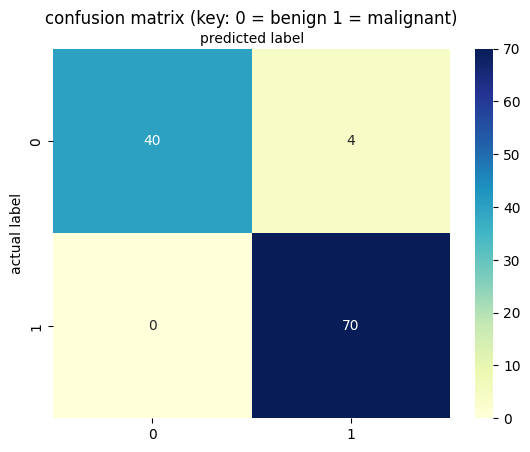

In [52]:
# Create confusion matrix
cm = confusion_matrix(y_test,preds)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position('top')
plt.title('confusion matrix (key: 0 = benign 1 = malignant)')
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [ ]:
#Part 2, Logistic Regression, 30 parameters, using parameter penalties

In [54]:
# Create logistic regression model
C = [100, 10, 1, .1, .001]
best_C = 0
best_acc = 0
for c in C:
    clf = LogisticRegression(penalty='l1',C=c,solver='liblinear')
    clf.fit(x_train,y_train)
    train_accuracy = clf.score(x_train,y_train)
    val_accuracy = clf.score(x_test,y_test)
    if(val_accuracy>best_acc):
        best_acc = val_accuracy
        best_C = c
    print('C: ',c)
    print('training accuracy:',train_accuracy)
    print('validation accuracy:',val_accuracy)
    print('')

C:  100
training accuracy: 0.9978021978021978
validation accuracy: 0.9473684210526315

C:  10
training accuracy: 0.9912087912087912
validation accuracy: 0.956140350877193

C:  1
training accuracy: 0.989010989010989
validation accuracy: 0.956140350877193

C:  0.1
training accuracy: 0.978021978021978
validation accuracy: 0.9473684210526315

C:  0.001
training accuracy: 0.36923076923076925
validation accuracy: 0.38596491228070173



In [55]:
# Create classification report from best model
clf = LogisticRegression(penalty='l1',C=best_C,solver='liblinear')
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
cr = classification_report(y_test,preds)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        44
           1       0.93      1.00      0.97        70

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(50.722222222222214, 0.5, 'actual label')

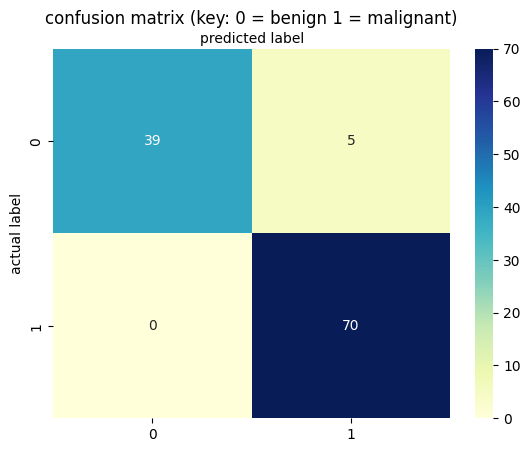

In [56]:
# Create confusion matrix
cm = confusion_matrix(y_test,preds)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position('top')
plt.title('confusion matrix (key: 0 = benign 1 = malignant)')
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [ ]:
##_________________________________________##
## Problem 4
##_________________________________________##

In [ ]:
#Part 1, logistic regression, 30 parameters, no parameter penalties

In [57]:
# Create kfold and cross validate model

N = [5,10]
for n in N:
    kfold = KFold(n_splits=n,random_state=0,shuffle=True)
    clf = LogisticRegression(solver='liblinear')
    cvs = cross_val_score(clf,x,y,cv=kfold)
    print('Kfolds: ', n)
    print('Accuracy: ',cvs.mean()*100)
    print('')

Kfolds:  5
Accuracy:  95.43393882937433

Kfolds:  10
Accuracy:  95.43233082706764



In [ ]:
# Accuracy was on average slightly worse than the model in problem 3 part 1

In [ ]:
#Part 2, logistic regression, 30 parameters, parameter penalties

In [58]:
# Create kfold and cross validate model

N = [5,10]
for n in N:
    kfold = KFold(n_splits=n,random_state=0,shuffle=True)
    clf = LogisticRegression(penalty='l1',solver='liblinear')
    cvs = cross_val_score(clf,x,y,cv=kfold)
    print('Kfolds: ', n)
    print('Accuracy: ',cvs.mean()*100)
    print('')

Kfolds:  5
Accuracy:  95.43393882937433

Kfolds:  10
Accuracy:  95.07832080200501



In [ ]:
# Again, the average accuracy was slightly lower than its counterpart in problem 3 part 2